In [7]:
from algorithms.AStarParallelVersion import parallel_a_star, a_star, generate_large_matrix
import matplotlib.pyplot as plt

In [8]:
SIZE = 900

START = (0, 0)
END = (SIZE - 1, SIZE - 1)

# THREADS_NUM = [2, 4, 8, 10]

matrix = generate_large_matrix(SIZE)
matrix[START[0]][START[1]] = 0
matrix[END[0]][END[1]] = 0

In [9]:
import time
from tqdm import tqdm


THREADS_NUM = [2, 4, 8, 10]
for thread in THREADS_NUM:
    total = 0
    iter = 20
    for i in tqdm(range(iter)):
        start_time = time.time()
        path_length = parallel_a_star(matrix, START, END, thread)
        end_time = time.time()
    
        execution_time = end_time - start_time
        total += execution_time

    print(f"Average time: {round(total / iter, 4)} seconds for {SIZE}x{SIZE} with {thread} threads")

100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Average time: 0.2066 seconds for 900x900 with 2 threads


100%|██████████| 20/20 [00:02<00:00,  7.82it/s]


Average time: 0.1272 seconds for 900x900 with 4 threads


100%|██████████| 20/20 [00:01<00:00, 13.00it/s]


Average time: 0.0766 seconds for 900x900 with 8 threads


100%|██████████| 20/20 [00:01<00:00, 10.50it/s]

Average time: 0.095 seconds for 900x900 with 10 threads


In [10]:
import time

total = 0
iter = 20

THREADS = 4


for i in range(iter):
    start_time = time.time()
    path_length = parallel_a_star(matrix, START, END, THREADS)
    end_time = time.time()
    
    execution_time = end_time - start_time
        
    # print("Execution time:", round(execution_time, 4), "seconds")
    
    total += execution_time
    
print(f"Average time: {round(total / iter, 4)} seconds for {SIZE}x{SIZE}")

Average time: 0.1412 seconds for 900x900


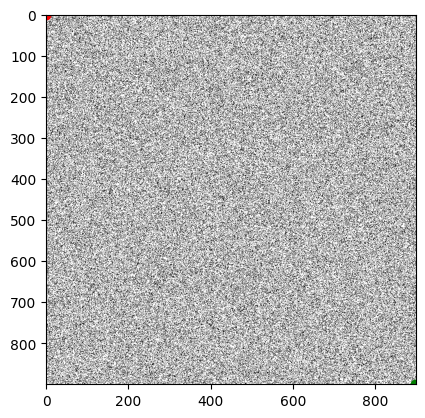

In [11]:
plt.imshow(matrix, cmap='binary')
plt.plot(START[0], START[1], marker='o', color='red')
plt.plot(END[0], END[1], marker='o', color='green')
plt.show()

Execution time: 0.2389 seconds
Path length: 1805


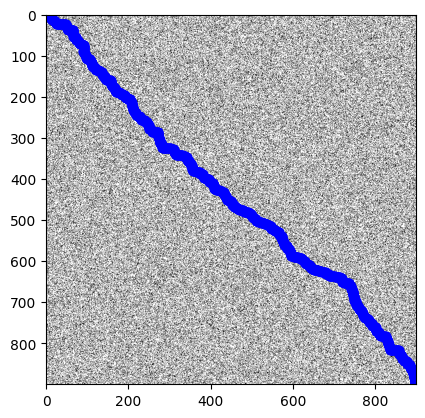

In [12]:
import time

start_time = time.time()
path_length = a_star(matrix, START, END)
end_time = time.time()

execution_time = end_time - start_time
    
print("Execution time:", round(execution_time, 4), "seconds")
print("Path length:", len(path_length))

plt.imshow(matrix, cmap='binary')
plt.plot(START[0], START[1], marker='o', color='red')
plt.plot(END[0], END[1], marker='o', color='green')

if path_length:
   x_coords, y_coords = zip(*path_length)
   plt.plot(y_coords, x_coords, marker='o', color='blue')
plt.show()

Executing with 2 number of threads
Execution time: 0.1993 seconds
Path length: 1808


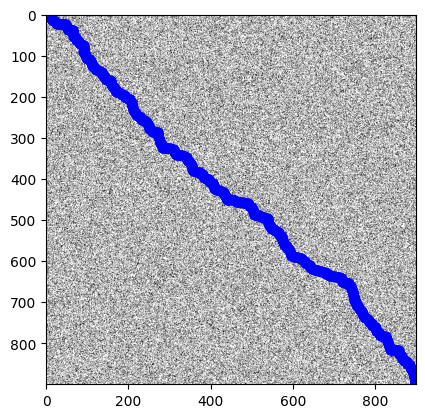

Executing with 4 number of threads
Execution time: 0.1292 seconds
Path length: 1816


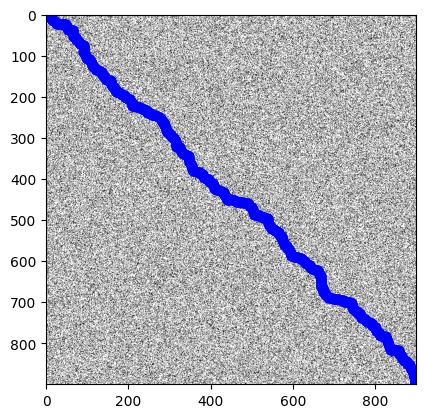

Executing with 8 number of threads
Execution time: 0.083 seconds
Path length: 1830


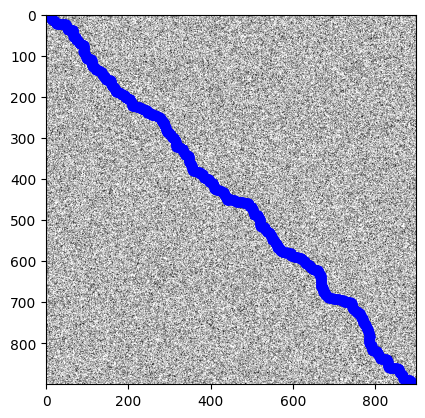

Executing with 10 number of threads
Execution time: 0.0985 seconds
Path length: 1870


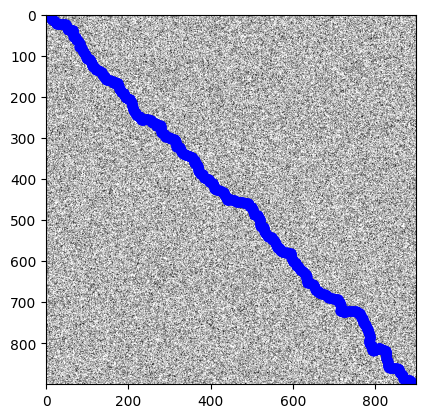

In [13]:
for num in THREADS_NUM:
    print(f'Executing with {num} number of threads')
    start_time = time.time()
    path_length = parallel_a_star(matrix, START, END, num)
    end_time = time.time()
    
    execution_time = end_time - start_time
        
    print("Execution time:", round(execution_time, 4), "seconds")
    print("Path length:", sum(len(path) for path in path_length if path))
    
    plt.imshow(matrix, cmap='binary')
    plt.plot(START[0], START[1], marker='o', color='red')
    plt.plot(END[0], END[1], marker='o', color='green')
    
    for path in path_length:
        if path:
            x_coords, y_coords = zip(*path)
            plt.plot(y_coords, x_coords, marker='o', color='blue')
    plt.show()